In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Attrition: leaving the service/organization 
Employee Churn: Employees leaving the organization 

In [2]:
data = pd.read_csv("employees.csv")
data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [3]:
data['left'].value_counts()      # 0 = not on notice period, 1 = on notice period

0    11428
1     3571
Name: left, dtype: int64

In [4]:
data.rename(columns = {'timeSpent.company' : 'timeSpent_company'}, inplace=True)

In [5]:
data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent_company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
data.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
data.isnull()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent_company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [10]:
# fillna() =-----> replaces the null values
# dropna() -------> drops and removes all the null values at a single time

In [11]:
#duplicate records => all those records/rows where all the columns have same value
data.duplicated().sum()

3008

In [12]:
data[data.duplicated()]             #this gives index values of all the records where value is duplicated

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
263,0.46,0.57,2,139,3,0,1,0,sales,low
877,0.37,0.51,2,127,3,0,1,0,sales,medium
974,0.42,0.53,2,142,3,0,1,0,sales,low
1017,0.40,0.50,2,127,3,0,1,0,IT,low
1241,0.10,0.85,6,266,4,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14985,0.95,0.84,3,270,3,1,0,1,sales,medium
14987,0.37,0.45,2,126,3,0,1,0,support,medium
14988,0.43,0.57,2,157,3,0,1,0,sales,low
14993,0.61,0.89,3,242,10,0,0,0,sales,high


In [13]:
#drop duplicate records
data = data.drop_duplicates(keep = "first")

In [14]:
data.shape                     # 14999 - 3008

(11991, 10)

In [15]:
data.corr()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years
satisfactoryLevel,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
lastEvaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
numberOfProjects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
avgMonthlyHours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
timeSpent_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
workAccident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotionInLast5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


In [17]:
# if corr() gives error due to categorical columns use below code
# data.corr(numeric_only = True)

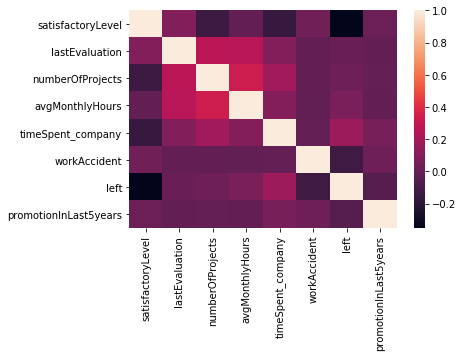

In [19]:
# Heatmap to view correlation
sns.heatmap(data.corr())

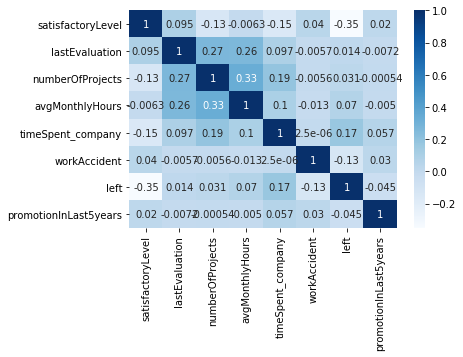

In [21]:
sns.heatmap(data.corr(), annot = True, cmap = 'Blues')

In [22]:
data.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent_company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

In [30]:
ftr = ['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent_company', 'workAccident',
       'promotionInLast5years', 'dept', 'salary']

In [24]:
for i,j in enumerate(ftr):
    print(i,j)

0 satisfactoryLevel
1 lastEvaluation
2 numberOfProjects
3 avgMonthlyHours
4 timeSpent_company
5 workAccident
6 left
7 promotionInLast5years
8 dept
9 salary


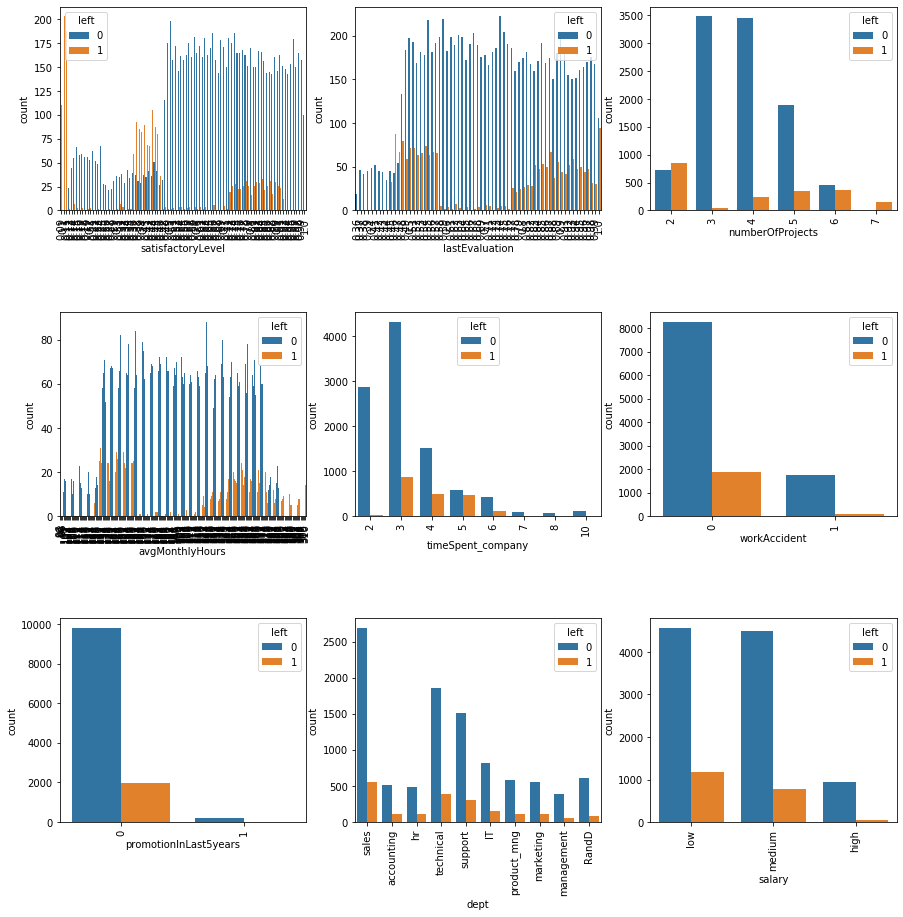

In [31]:
fig = plt.subplots(figsize = (15,15))     #creates a figure with specified size

for p,q in enumerate(ftr):
    plt.subplot(3,3,p+1)
    plt.subplots_adjust(hspace = 0.5)     #horizontal space between the rows in each graph
    sns.countplot(x = q, data = data, hue = 'left')
    plt.xticks(rotation=90)               #rotates x-axis labels to 90 degrees

In [32]:
#since satisfactoryLevel, lastEvaluation, avgMonthlyHours are not giving useful information. Remove these fields from the plot
ftr = ['numberOfProjects',
        'timeSpent_company', 'workAccident',
       'promotionInLast5years', 'dept', 'salary']

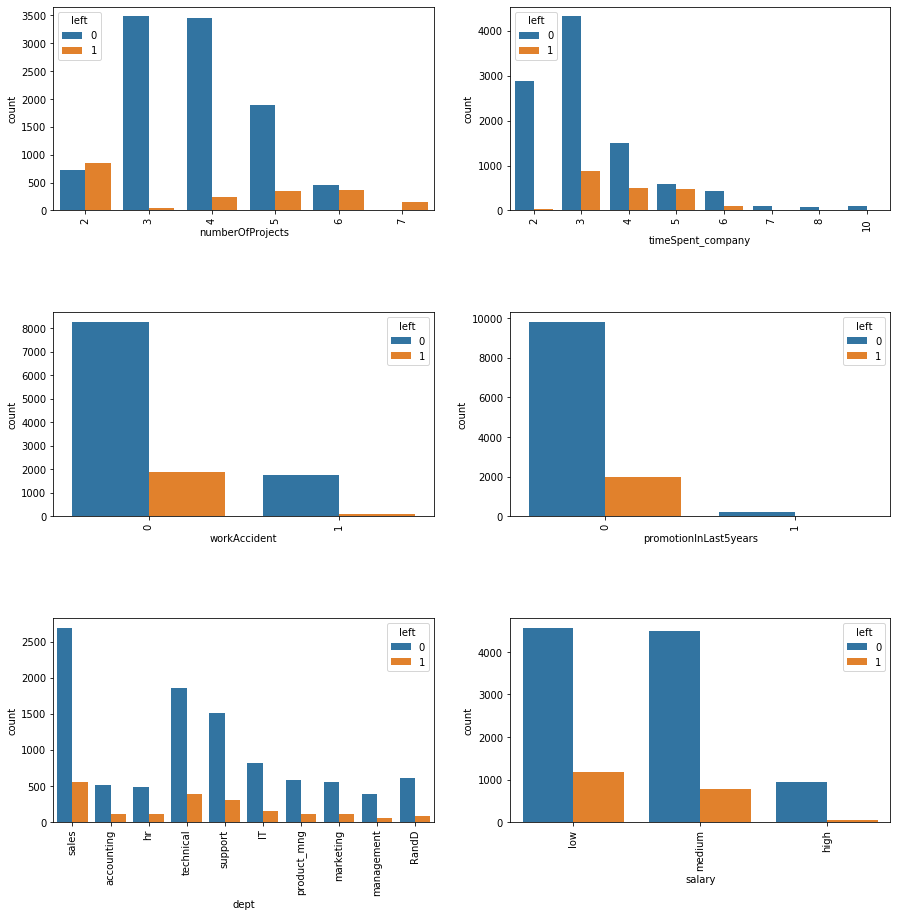

In [33]:
fig = plt.subplots(figsize = (15,15))     #creates a figure with specified size

for p,q in enumerate(ftr):
    plt.subplot(3,2,p+1)
    plt.subplots_adjust(hspace = 0.5)     #horizontal space between the rows in each graph
    sns.countplot(x = q, data = data, hue = 'left')
    plt.xticks(rotation=90)               #rotates x-axis labels to 90 degrees

In [ ]:
# CONCLUSION:


# PROJECTS: From the above graph we saw that the employees who are working on the multiple projects at a time are currently on notice period.

# TIME_SPENT: 3 To 6 years is a very crucial time period.

# PROMOTION: Employees who have not been promoted in last 5 years are currently serving the notice period

# SALARY: employees getting lower salary are serving the notice period along with those who get medium and higher salary but less in number